<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

**Problem Statement:**

Create a box plot to visualize the distribution of <code>salary_hour_avg</code> for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

***Hint:**

Use the DataFrampes <code>plot()</code> method to create the box plot. Customize the x-axis and y-axis labels using <code>plt.xlabel()</code> and <code>plt.ylabel()</code>.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]

# Drop NaN values from the column for plotting
df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

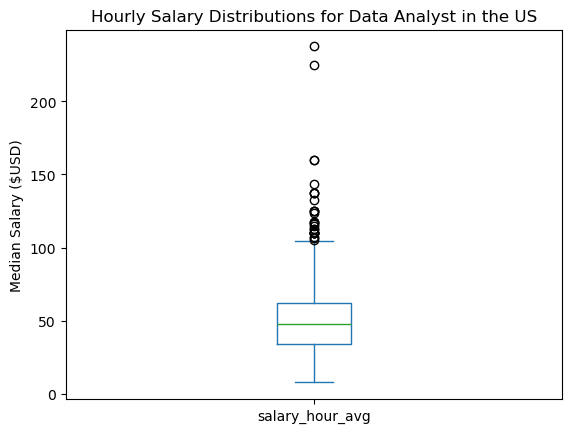

In [6]:
df_DS_US['salary_hour_avg'].plot(kind='box')
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Hourly Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

**Problem Statement:**

Create a box plot to compare the distribution of <code>salary_hour_avg</code> for Data Analyst job postings in the United States and Canada.

- Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
- Use list comprehension to create a list of DataFrames for each country.
- Use the <code>plt.boxplot()</code> function to plot this list and specify the <code>labels</code> as <code>countries</code>.
- Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

**Code Needed:**
<code>countries = ['United States', 'Canada']</code>

**Hint:**
Use the <code>plt.boxplot()</code> function to create the box plot and customize the y-axis labels using  <code>plt.ylabel()</code>.

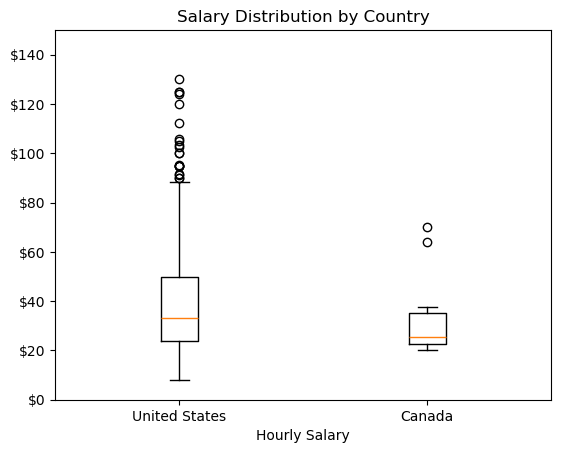

In [19]:
countries = ['United States', 'Canada']
df_DA_NA = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

country_list = [df_DA_NA[df_DA_NA['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_list, labels=countries)
plt.title('Salary Distribution by Country')
plt.xlabel('Hourly Salary')
plt.ylim(0, 150)
ticks_y = plt.FuncFormatter(lambda y, pos: f'${int(y)}')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.show()


---

## 🟥 Comparison of Hourly Salaries in Germany (2.18.3)

**Problem Statement:**

- Create a box plot to compare the distribution of <code>salary_hour_avg</code> for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
- Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.

**Code Needed:**

<code>job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']</code>

**Hint:**

- Create a box plot using <code>ax.boxplot()</code> after setting up your figure and axes with <code>plt.subplots()</code>.
- Customize the x-axis and y-axis labels using <code>ax.set_xlabel()</code> and <code>ax.set_ylabel()</code>.
- Apply a custom formatter to the y-axis to format salary values as currency.


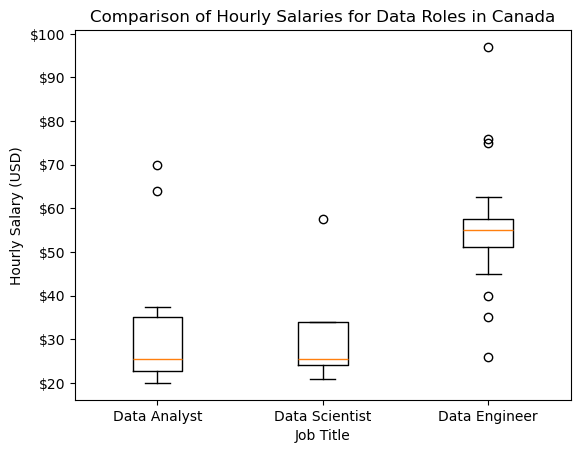

In [31]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
country = 'Canada'
df_Germany = df[(df['job_country'] == country) & (df['job_title_short'].isin(job_titles))].dropna(subset=['salary_hour_avg'])
job_list = [df_Germany[df_Germany['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]
# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()

---